# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast,json
from datetime import datetime
%matplotlib inline

## Load the dataset

In [2]:
credits_df= pd.read_csv("tmdb-5000-movie-dataset/tmdb_5000_credits.csv")
movies_df = pd.read_csv("tmdb-5000-movie-dataset/tmdb_5000_movies.csv")
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Identifying Primary Questions

1. Which are the 5 most expensive movies?
2. Top 5 most profitable movies?
3. Most talked about Movies?
4. Average runtime of movies?
5. Movies which are rated above 7 by the critics?
6. Which year did we have the most profitable movies?

## Identifying Secondary Questions

1. Most successful genre.
2. Frequent Cast in movies.
3. Average budget of the profitable movies.
4. Average duration of the most profitable movies.
5. Language of the most profitable movies.

In [3]:
# merging the two dataframes
movies_df = pd.merge(movies_df, credits_df, left_on ='id', right_on='movie_id', how='left', suffixes=('', '_y'))
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'crew'],
      dtype='object')

## Data Cleaning Process


   ### Steps to be taken to clean the data.

1. We need to remove unused column such as id, imdb_id, vote_count, production_company, keywords, homepage etc.
2. Removing the duplicacy in the rows(if any).
3. Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries.
4. Changing release date column into date format.
5. Replacing zero with NAN in runtime column.
6. Changing format of budget and revenue column

In [4]:
cols = ['keywords', 'homepage' , 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y']
movies_df=movies_df.drop(cols,axis=1)
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Handling JSON in some columns

In [5]:
def parse_col_json(column,key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1 = []
        for j in range(len(i)):
            list1.append(i[j][key])
        movies_df.loc[index,column]=str(list1)
        
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,49026,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
#  dropping the duplicates from the dataset.
print(movies_df.shape)
movies_df = movies_df.drop_duplicates(keep='first')
print(movies_df.shape)

(4803, 15)
(4803, 15)


In [7]:
# replacing all the zeros from revenue and budget cols.

cols = ['budget', 'revenue']
movies_df[cols] = movies_df[cols].replace(0, np.nan)

# dropping all the rows with na in the columns mentioned above in the list.
movies_df.dropna(subset=cols, inplace=True)
movies_df.shape

(3229, 15)

In [8]:
# Changing the release_date column to DateTime column

movies_df.release_date =  pd.to_datetime(movies_df['release_date'])
movies_df.head(3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [9]:
# Creating a new column from containing year only from release_date

movies_df['release_year']= movies_df['release_date'].dt.year
movies_df.head(3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2.787965e+09,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009
1,300000000.0,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,9.610000e+08,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
2,245000000.0,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,8.806746e+08,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015


In [10]:
# Changing the data type of the below mentioned columns and 
#change_cols=['budget', 'revenue']
#changing data type
#movies_df[change_cols]=movies_df[change_cols].applymap(np.int64)
movies_df.budget= movies_df['budget'].astype(np.int64,inplace=True)
movies_df.revenue= movies_df['revenue'].astype(np.int64)
movies_df.dtypes

budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
movie_id                         int64
cast                            object
crew                            object
release_year                     int64
dtype: object

## Answer to Question 1

In [11]:
# Answer to question #1.
# To find out the most expensive movies, we need to look at the budget set for them which is an indicator of expense.

# below are the 5 most expensive movies in descending order.
expensive_movies_df = movies_df.sort_values('budget',ascending=False).head()
expensive_movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,1865,"['Johnny Depp', 'Penélope Cruz', 'Ian McShane'...","[{""credit_id"": ""566b4f54c3a3683f56005151"", ""de...",2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,99861,"['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de...",2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,1452,"['Brandon Routh', 'Kevin Spacey', 'Kate Boswor...","[{""credit_id"": ""553bef6a9251416874003c8f"", ""de...",2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,49529,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012


In [12]:
# Function to find maximum and minimum in a given column.

def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5 and bottom 5 movies dataframe in that column.
    
    args:
        col: string
    return:
        info_df: dataframe - final 5 movies dataframe
    """
    
    top = movies_df[col].idxmax()
    top_df =  pd.DataFrame(movies_df.loc[top])
    
    bottom =  movies_df[col].idxmin()
    bottom_df = pd.DataFrame(movies_df.loc[bottom])
    
    info_df = pd.concat([top_df,bottom_df],axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
id,1865,3082
popularity,135.414,28.2765
production_countries,['United States of America'],['United States of America']
release_date,2011-05-14 00:00:00,1936-02-05 00:00:00
revenue,1045713802,8500000
runtime,136,87
spoken_languages,"['English', 'Español']",['English']
title,Pirates of the Caribbean: On Stranger Tides,Modern Times


## Answer to Question 2

In [13]:
# to find the most profitable movies, we need to find who made the most 
# amount after deducting the budget from the revenue generated.

movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
movies_df.sort_values('profit',ascending=False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,597,"['Kate Winslet', 'Leonardo DiCaprio', 'Frances...","[{""credit_id"": ""52fe425ac3a36847f8017985"", ""de...",1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,135397,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...","[{""credit_id"": ""52fe4bf7c3a368484e1a0683"", ""de...",2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,168259,"['Vin Diesel', 'Paul Walker', 'Dwayne Johnson'...","[{""credit_id"": ""52fe4cc8c3a36847f823e699"", ""de...",2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,24428,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de...",2012,1299557910


In [14]:
# Comparison between min and max profits
find_min_max_in('profit')

,0,13
budget,237000000,255000000
genres,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Action', 'Adventure', 'Western']"
id,19995,57201
popularity,150.438,49.047
production_countries,"['United States of America', 'United Kingdom']",['United States of America']
release_date,2009-12-10 00:00:00,2013-07-03 00:00:00
revenue,2787965087,89289910
runtime,162,149
spoken_languages,"['English', 'Español']",['English']
title,Avatar,The Lone Ranger


In [15]:
# to find the most talked about movies, we can sort the dataframe on the popularity column
#popular_movies_df = movies_df.sort_values(by ='budget', ascending=False).head()
#popular_movies_df.head()
popular_movies_df = movies_df.sort_values('popularity',ascending=False)
popular_movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,211672,"['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,157336,"['Matthew McConaughey', 'Jessica Chastain', 'A...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,293660,"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,118340,"['Chris Pratt', 'Zoe Saldana', 'Dave Bautista'...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,76341,"['Tom Hardy', 'Charlize Theron', 'Nicholas Hou...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",2015,228858340


In [16]:
# Comparison between min and max popularity
find_min_max_in('popularity')

,546,3921
budget,74000000,3000000
genres,"['Family', 'Animation', 'Adventure', 'Comedy']",['Drama']
id,211672,44634
popularity,875.581,0.019984
production_countries,['United States of America'],['United States of America']
release_date,2015-06-17 00:00:00,2004-09-30 00:00:00
revenue,1156730962,6804016
runtime,91,94
spoken_languages,['English'],['English']
title,Minions,Woman Thou Art Loosed


## Answer to Question 3

In [17]:
# Min-Max in terms of runtime
find_min_max_in('runtime')

,2384,3626
budget,18000000,5000000
genres,"['Crime', 'Drama', 'Thriller', 'History']",['Documentary']
id,43434,78394
popularity,1.13838,4.49837
production_countries,"['France', 'Germany']","['France', 'United Kingdom']"
release_date,2010-05-19 00:00:00,2010-05-14 00:00:00
revenue,871279,4074023
runtime,338,41
spoken_languages,"['Français', 'Deutsch', 'English', 'Español', ...",['English']
title,Carlos,Sea Rex 3D: Journey to a Prehistoric World


In [18]:
# Average runtime of movies
movies_df['runtime'].mean()

110.72437287085785

## Answer to question #4

In [19]:
# movies rated above 7 

movies_df[movies_df['vote_average']>=7].sort_values('vote_average',ascending=False)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year,profit
2970,10500000,"['Drama', 'Comedy']",88641,0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],There Goes My Baby,8.5,2,88641,"['Dermot Mulroney', 'Ricky Schroder', 'Kelli W...","[{""credit_id"": ""598db4fcc3a368758e01220c"", ""de...",1994,-10376491
1881,25000000,"['Drama', 'Crime']",278,136.747729,['United States of America'],1994-09-23,28341469,142.0,['English'],The Shawshank Redemption,8.5,8205,278,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",1994,3341469
3337,6000000,"['Drama', 'Crime']",238,143.659698,['United States of America'],1972-03-14,245066411,175.0,"['English', 'Italiano', 'Latin']",The Godfather,8.4,5893,238,"['Marlon Brando', 'Al Pacino', 'James Caan', '...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",1972,239066411
1818,22000000,"['Drama', 'History', 'War']",424,104.469351,['United States of America'],1993-11-29,321365567,195.0,"['Deutsch', 'Polski', 'עִבְרִית', 'English']",Schindler's List,8.3,4329,424,"['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...","[{""credit_id"": ""52fe4242c3a36847f8010303"", ""de...",1993,299365567
3865,3300000,['Drama'],244786,192.528841,['United States of America'],2014-10-10,13092000,105.0,['English'],Whiplash,8.3,4254,244786,"['Miles Teller', 'J.K. Simmons', 'Melissa Beno...","[{""credit_id"": ""54d5356ec3a3683ba0000039"", ""de...",2014,9792000
3232,8000000,"['Thriller', 'Crime']",680,121.463076,['United States of America'],1994-10-08,213928762,154.0,"['English', 'Español', 'Français']",Pulp Fiction,8.3,8428,680,"['John Travolta', 'Samuel L. Jackson', 'Uma Th...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",1994,205928762
662,63000000,['Drama'],550,146.757391,"['Germany', 'United States of America']",1999-10-15,100853753,139.0,['English'],Fight Club,8.3,9413,550,"['Edward Norton', 'Brad Pitt', 'Meat Loaf', 'J...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",1999,37853753
2731,13000000,"['Drama', 'Crime']",240,105.792936,['United States of America'],1974-12-20,47542841,200.0,"['English', 'Italiano', 'Latin', 'Español']",The Godfather: Part II,8.3,3338,240,"['Al Pacino', 'Robert Duvall', 'Diane Keaton',...","[{""credit_id"": ""52fe422bc3a36847f8009501"", ""de...",1974,34542841
2294,15000000,"['Fantasy', 'Adventure', 'Animation', 'Family']",129,118.968562,['Japan'],2001-07-20,274925095,125.0,['日本語'],Spirited Away,8.3,3840,129,"['Rumi Hiiragi', 'Miyu Irino', 'Mari Natsuki',...","[{""credit_id"": ""571e4beec3a3683393000236"", ""de...",2001,259925095
3719,3000000,['Drama'],510,127.525581,['United States of America'],1975-11-18,108981275,133.0,['English'],One Flew Over the Cuckoo's Nest,8.2,2919,510,"['Jack Nicholson', 'Louise Fletcher', 'Danny D...","[{""credit_id"": ""52fe424cc3a36847f80134e7"", ""de...",1975,105981275


In [20]:
movies_df.groupby('release_year')

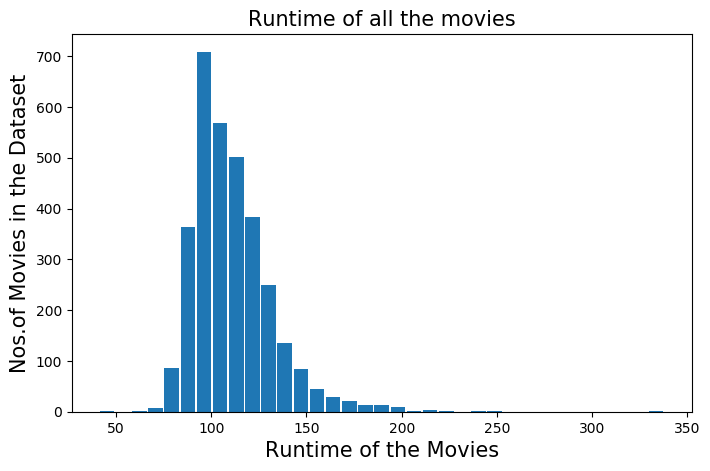

In [21]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(8,5),dpi=100)
#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(movies_df['runtime'],rwidth=0.9,bins=35)
plt.show()

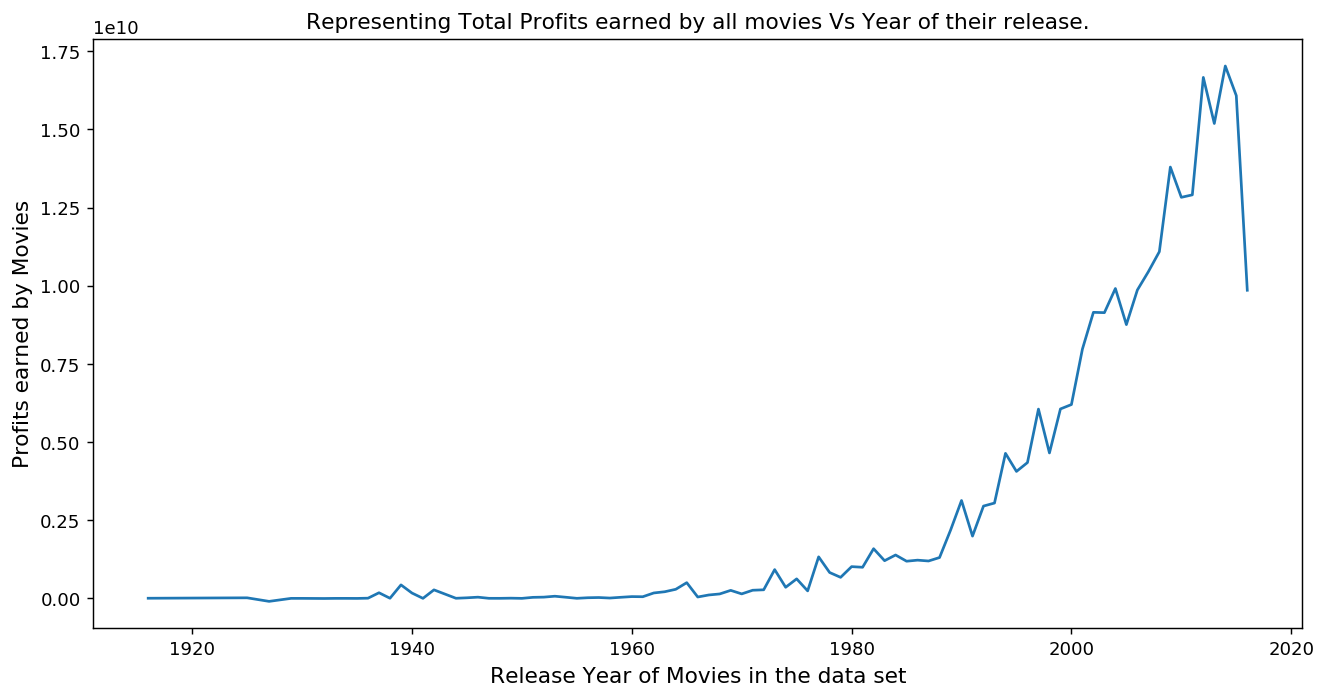

In [22]:
profits_year = movies_df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [23]:
# Most profitable year from the given dataset.

profits_year.idxmax()

2014

In [24]:
#selecting the movies having profit $50M or more
profit_data = movies_df[movies_df['profit'] >= 50000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movie_id,cast,crew,release_year,profit
1,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,19995,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009,2550965087
2,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,285,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007,661000000
3,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,206647,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015,635674609


In [25]:
profit_data['genres'] = profit_data['genres'].str.strip('[]').replace(' ','').replace("'",'')
profit_data['genres'] = profit_data['genres'].str.split(',')
profit_data.head(3)

/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


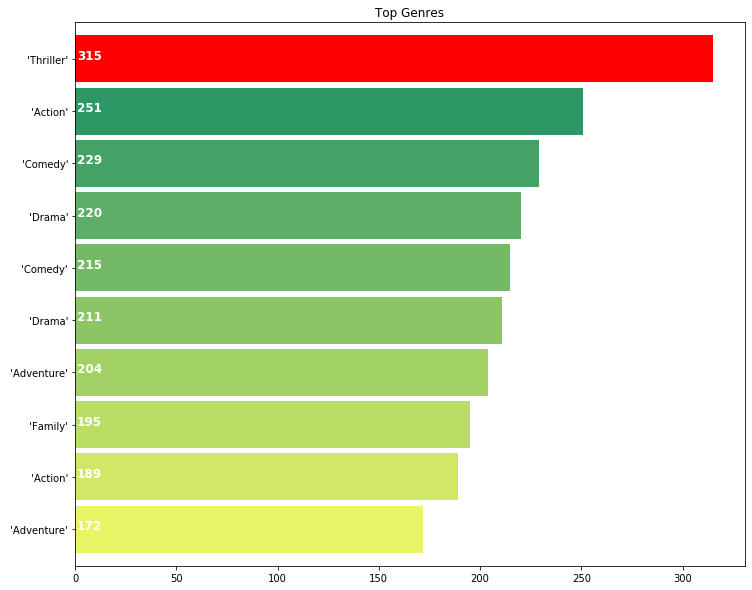

In [52]:
plt.subplots(figsize=(12,10))
list2=[]

# extending the list to 
for i in profit_data['genres']:
    list2.extend(i)
    
ax = pd.Series(list2).value_counts()[:10].sort_values(ascending=True).plot.barh(
    width=0.9,
    color=sns.color_palette('summer_r',10))

for i, v in enumerate(pd.Series(list2).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()


## Most frequent cast

#### Let's try to find out the most frequent cast in the movies based on which we can tell about the success factor of the cast.

Thriller looks like the most preferred option to make profitable movies.

In [57]:
profit_data['cast'] = profit_data['cast'].str.strip('[]').replace(' ','').replace("'",'')

/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
profit_data['cast'] = profit_data['cast'].str.split(',')

/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


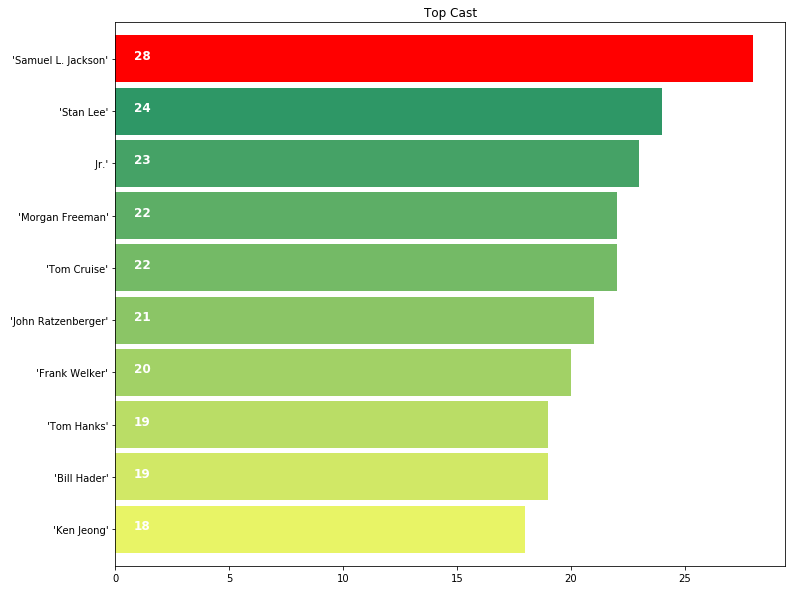

In [60]:
plt.subplots(figsize=(12,10))
list1=[]
for i in profit_data['cast']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Cast')
plt.show()

## Answer to secondary question #3

In [66]:
profit_data['profit'].mean()

198990033.2565737

In [67]:
profit_data['revenue'].mean()

262022090.17768925

## Answer to secondary question #4

In [68]:
profit_data['runtime'].mean()

114.37928286852589

## Answer to secondary question #5

/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/vertica_data/chinmay_news_analysis/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/

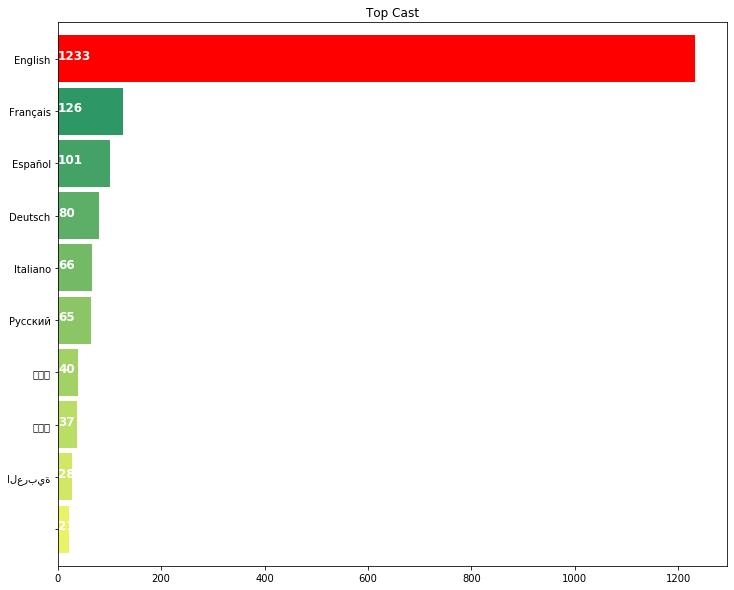

In [73]:
profit_data['spoken_languages']=profit_data['spoken_languages'].str.strip('[]').str.replace(' ','').str.replace("'",'')
profit_data['spoken_languages']=profit_data['spoken_languages'].str.split(',')

plt.subplots(figsize=(12,10))
list1=[]
for i in profit_data['spoken_languages']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Cast')
plt.show()

English seems to be the most profitable language.

## Conclusion

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

##### For a Movie to be in successful criteria

Average Budget must be around 63 millon dollar Average duration of the movie must be 114 minutes Any one of these should be in the cast : Samuel Jackson, Robert De Neiro, Morgan Freeman, Bruce Willis Genre must be : Action, Adventure, Thriller, Comedy, Drama. By doing all this the movie might be one of the hits and hence can earn an average revenue of around 262 million dollar.